<a href="https://colab.research.google.com/github/BrunoMian/site/blob/master/Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o ambiente

In [ ]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.1)


# Importando as bibliotecas e os datasets

In [ ]:
# Importing pathlib
from pathlib import Path

# Import numpy
import numpy as np

# Import pandas
import pandas as pd

# Import matplot lib
%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100) # Display more dataframe columns in Jupyter

# Import training features
!wget https://s3.amazonaws.com/drivendata-prod/data/66/public/training_set_features.csv

features_df = pd.read_csv(
    "training_set_features.csv", 
    index_col="respondent_id"
)

# Import training labels
!wget https://s3.amazonaws.com/drivendata-prod/data/66/public/training_set_labels.csv
labels_df = pd.read_csv(
    "training_set_labels.csv", 
    index_col="respondent_id"
)

--2020-07-29 01:08:13--  https://s3.amazonaws.com/drivendata-prod/data/66/public/training_set_features.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.136.158
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.136.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4619138 (4.4M) [text/csv]
Saving to: ‘training_set_features.csv.1’

training_set_featur 100%[===================>]   4.40M  --.-KB/s    in 0.1s    

2020-07-29 01:08:14 (39.1 MB/s) - ‘training_set_features.csv.1’ saved [4619138/4619138]

--2020-07-29 01:08:18--  https://s3.amazonaws.com/drivendata-prod/data/66/public/training_set_labels.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.165.237
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.165.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256004 (250K) [text/csv]
Saving to: ‘training_set_labels.csv.1’

training_set_labels 100%[===================>] 250.00K  --.-KB/s    in 0.05s   

# Visualizando os dados

In [ ]:
# Mostra as features
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [ ]:
# Mostra as labels
print("labels_df.shape", labels_df.shape)
labels_df.head() 

labels_df.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


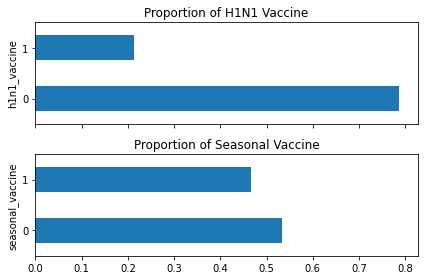

In [ ]:
# Plota a distribuição de valores das labels do dataset
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]

(labels_df['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine") # Distribuição para a vacina de H1N1

(labels_df['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine") # Distribuição para a vacina de Seasonal Flu

fig.tight_layout()

# Pré-processamento de dados

In [ ]:
# Importando os módulos do Scikit-learn learn para treinar o modelo
# Pré-processamento de dados
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Modelos de aprendizado de máquina
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline

# Métricas de avaliação
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 6    # Set a random seed for reproducibility!

In [ ]:
#Transformação e separação de str em int;
new_features_df = pd.get_dummies(features_df,columns =["sex","marital_status", "rent_or_own", "age_group", "education", "race", "income_poverty", "employment_status", "census_msa"]);

#Definação de uma unica coluna para sexo, estado_civil, Aluguel
new_features_df = new_features_df.drop(["sex_Male"], axis = 1);
new_features_df = new_features_df.rename(columns={"sex_Female":"sex"});

new_features_df = new_features_df.drop(["marital_status_Not Married"], axis = 1);
new_features_df = new_features_df.rename(columns={"marital_status_Married":"marital_status"});

new_features_df = new_features_df.drop(["rent_or_own_Rent"], axis = 1);
new_features_df = new_features_df.rename(columns={"rent_or_own_Own":"rent_or_own"});

#Elimina variaveis com muitos vazios
new_features_df = new_features_df.drop(columns=["employment_industry", "employment_occupation","hhs_geo_region"]);

numeric_features_df = new_features_df.apply(pd.to_numeric).astype(float) # convert all columns of DataFrame

numeric_features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,sex,marital_status,rent_or_own,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Para pré-processamento de dados, vamos usar uma estratégia para preencher dados vazios:

- NA Imputer: Colocando um valor em todos os campos que estão marcados com NaN (Not a Number), usando o SimpleImputer do Scikit para trocar os valores NaN para a média dos valores da feature em que eles estão;

In [ ]:
# Aplica o imputer para preencher os valores de NaN no dataset
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(numeric_features_df)
numeric_features_filled_df = numeric_features_df.copy()
numeric_features_filled_df.loc[:, :] = imputer.transform(numeric_features_df)[:, :]
numeric_features_filled_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,sex,marital_status,rent_or_own,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,1.00000,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,1.00000,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.220312,0.329735,1.0,0.0,0.0,0.87972,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,0.87972,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.87972,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Criando as variáveis finais das features (X) e dos labels (Y)
X = numeric_features_filled_df
y = labels_df

# Separando o dataset em training set e test set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    shuffle=True,
    stratify=y,
    random_state=RANDOM_SEED
)

# Separando as labels para cada um dos casos (h1n1 e seasonal flu)
y_train_h1n1 = y_train.loc[:, "h1n1_vaccine"]
y_train_flu = y_train.loc[:, "seasonal_vaccine"]
y_test_h1n1 = y_test.loc[:, "h1n1_vaccine"]
y_test_flu = y_test.loc[:, "seasonal_vaccine"]

## Aplicando aos modelos

In [ ]:
# Funçaõ para plotar a curva ROC

def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score,)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

Aplicando ao modelo KNN

In [ ]:
# Treinando o modelo de KNN para prever as vacinas de H1N1:
# Instanciando um modelo de KNN com 15 neighbors
KNN_h1n1 = KNeighborsClassifier(n_neighbors=15, weights='uniform', p=2, metric='euclidean')
# Treinando o modelo com test features e test labels
KNN_h1n1.fit(X_train, y_train_h1n1)

# Treinando o modelo de KNN para prever as vacinas de H1N1:
# Instanciando um modelo de KNN com 15 neighbors
KNN_flu = KNeighborsClassifier(n_neighbors=15, weights='uniform', p=2, metric='euclidean')
# Treinando o modelo com test features e test labels
KNN_flu.fit(X_train, y_train_flu)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [ ]:
# Gerando as previsões das duas vacinas com base nas test features
predictions_KNN_h1n1 = KNN_h1n1.predict_proba(X_test)[:, 1]
predictions_KNN_flu = KNN_flu.predict_proba(X_test)[:, 1]

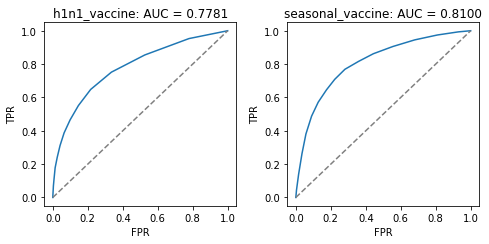

In [ ]:
# Plotando curva ROC

fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_test_h1n1, 
    predictions_KNN_h1n1, 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_test_flu, 
    predictions_KNN_flu, 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

Aplicando ao modelo SVM

In [ ]:
# Treinando um modelo SVM para prever as vacinas de H1N1:
# Instanciando um modelo de support vector machine com kernel polinomial
model_SVM_h1n1 = SVC(kernel="poly", probability=True)
# Treinando o modelo com os test features e test labels
model_SVM_h1n1.fit(X_train, y_train_h1n1)

# Treinando um modelo para prever as vacinas da seasonal flu:
# Instanciando um modelo de support vector machine com kernel polinomial
model_SVM_flu = SVC(kernel="poly", probability=True)
# Treinando o modelo com os test features e test labels
model_SVM_flu.fit(X_train, y_train_flu)

SVC(kernel='poly', probability=True)

In [ ]:
# Gerando as previsões das duas vacinas com base nas test features
predictions_SVM_h1n1 = model_SVM_h1n1.predict_proba(X_test)[:, 1]
predictions_SVM_flu = model_SVM_flu.predict_proba(X_test)[:, 1]

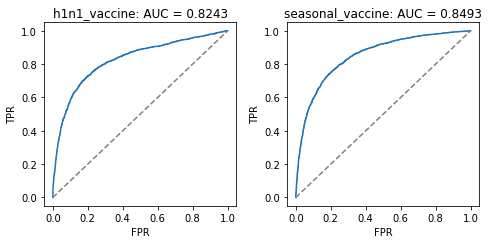

In [ ]:
# Plotando curva ROC

fig, ax = plt.subplots(1, 2, figsize=(7, 3.5), )

plot_roc(
    y_test_h1n1, 
    predictions_SVM_h1n1, 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_test_flu, 
    predictions_SVM_flu, 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

Aplicando ao modelo de Neural Network

In [ ]:
# Treinando um modelo Neural Network para prever as vacinas de H1N1:
# Instanciando um modelo de neural network
NN_h1n1 = MLPClassifier(solver='adam', alpha=0.0001, hidden_layer_sizes=(5, 2), random_state=RANDOM_SEED, max_iter=1000)
# Treinando o modelo com os test features e test labels
NN_h1n1.fit(X_train, y_train_h1n1)

# Treinando um modelo Neural Network para prever as vacinas de Seasonal FLu:
# Instanciando um modelo de neural network
NN_flu = MLPClassifier(solver='adam', alpha=0.0001, hidden_layer_sizes=(5, 2), random_state=RANDOM_SEED, max_iter=1000)
# Treinando o modelo com os test features e test labels
NN_flu.fit(X_train, y_train_flu)

In [ ]:
# Gerando as previsões das duas vacinas com base nas test features
predictions_NN_h1n1 = NN_h1n1.predict_proba(X_test)[:, 1]
predictions_NN_flu = NN_flu.predict_proba(X_test)[:, 1]

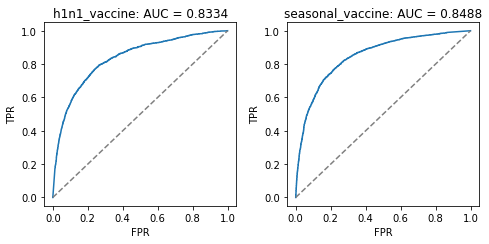

In [ ]:
# Plotando curva ROC

fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_test_h1n1, 
    predictions_NN_h1n1, 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_test_flu, 
    predictions_NN_flu, 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

# Submissão

In [ ]:
# Pegando o dataset de testes disponibilizado pelo Driven Data
!wget https://s3.amazonaws.com/drivendata-prod/data/66/public/test_set_features.csv
test_features_df = pd.read_csv("test_set_features.csv", index_col="respondent_id")

# Pegando o modelo de submissãão disponibilizado pelo Driven Data
!wget https://s3.amazonaws.com/drivendata-prod/data/66/public/submission_format.csv
submission_df = pd.read_csv("submission_format.csv", index_col="respondent_id")

--2020-07-29 01:35:10--  https://s3.amazonaws.com/drivendata-prod/data/66/public/test_set_features.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.239.181
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.239.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4633317 (4.4M) [text/csv]
Saving to: ‘test_set_features.csv’

test_set_features.c 100%[===================>]   4.42M  --.-KB/s    in 0.1s    

2020-07-29 01:35:10 (38.8 MB/s) - ‘test_set_features.csv’ saved [4633317/4633317]

--2020-07-29 01:35:12--  https://s3.amazonaws.com/drivendata-prod/data/66/public/submission_format.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.26.22
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.26.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 373956 (365K) [text/csv]
Saving to: ‘submission_format.csv’

submission_format.c 100%[===================>] 365.19K  --.-KB/s    in 0.05s   

2020-07-29 01:35:12 (6.6

In [ ]:
# Tratando os dados do test set

#Transformação e separação de str em int;
new_test_features_df = pd.get_dummies(test_features_df, columns =["sex","marital_status", "rent_or_own", "age_group", "education", "race", "income_poverty", "employment_status", "census_msa"]);

#Definação de uma unica coluna para sexo, estado_civil, Aluguel
new_test_features_df = new_test_features_df.drop(["sex_Male"], axis = 1);
new_test_features_df = new_test_features_df.rename(columns={"sex_Female":"sex"});

new_test_features_df = new_test_features_df.drop(["marital_status_Not Married"], axis = 1);
new_test_features_df = new_test_features_df.rename(columns={"marital_status_Married":"marital_status"});

new_test_features_df = new_test_features_df.drop(["rent_or_own_Rent"], axis = 1);
new_test_features_df = new_test_features_df.rename(columns={"rent_or_own_Own":"rent_or_own"});

#Elimina variaveis com muitos vazios
new_test_features_df = new_test_features_df.drop(columns=["employment_industry", "employment_occupation","hhs_geo_region"]);

numeric_test_features_df = new_test_features_df.apply(pd.to_numeric).astype(float) # convert all columns of DataFrame

# Aplica o imputer para preencher os valores de NaN no dataset
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(numeric_test_features_df)
numeric_test_features_filled_df = numeric_test_features_df.copy()
numeric_test_features_filled_df.loc[:, :] = imputer.transform(numeric_test_features_df)[:, :]
numeric_test_features_filled_df.head()

X_submission = numeric_test_features_filled_df

(26708, 48)


In [ ]:
# Fazendo as predições do dataset de submissão
# KNN:
submission_KNN_h1n1 = KNN_h1n1.predict_proba(X_submission)[:, 1]
submission_KNN_flu = KNN_flu.predict_proba(X_submission)[:, 1]

# SVM:
submission_SVM_h1n1 = model_SVM_h1n1.predict_proba(X_submission)[:, 1]
submission_SVM_flu = model_SVM_flu.predict_proba(X_submission)[:, 1]

# Neural Network:
submission_NN_h1n1 = NN_h1n1.predict_proba(X_submission)[:, 1]
submission_NN_flu = NN_flu.predict_proba(X_submission)[:, 1]

In [ ]:
KNN_submission_df = submission_df.copy()
SVM_submission_df = submission_df.copy()
NN_submission_df = submission_df.copy()

# Completando o dataframe de submissão
KNN_submission_df["h1n1_vaccine"] = submission_KNN_h1n1
KNN_submission_df["seasonal_vaccine"] = submission_KNN_flu

SVM_submission_df["h1n1_vaccine"] = submission_SVM_h1n1
SVM_submission_df["seasonal_vaccine"] = submission_SVM_flu

NN_submission_df["h1n1_vaccine"] = submission_NN_h1n1
NN_submission_df["seasonal_vaccine"] = submission_NN_flu

In [ ]:
# Submissão do KNN
KNN_submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.066667,0.466667
26708,0.000000,0.000000
26709,0.733333,0.933333
26710,0.200000,0.800000
26711,0.133333,0.400000


In [ ]:
# Submissão do SVM
SVM_submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.059797,0.155542
26708,0.074850,0.075639
26709,0.407353,0.800212
26710,0.563924,0.850424
26711,0.210053,0.475987


In [ ]:
# Submissão do NN
NN_submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.036838,0.129785
26708,0.025147,0.063391
26709,0.392142,0.768574
26710,0.464842,0.888516
26711,0.209321,0.501835


In [ ]:
# Criando os arquivos para submissão
# KNN:
OUTPUT_DATA_PATH_KNN = "KNN_submission.csv"
KNN_submission_df.to_csv(OUTPUT_DATA_PATH_KNN, index=True)

# KNN:
OUTPUT_DATA_PATH_SVM = "SVM_submission.csv"
SVM_submission_df.to_csv(OUTPUT_DATA_PATH_SVM, index=True)

# KNN:
OUTPUT_DATA_PATH_NN = "NN_submission.csv"
NN_submission_df.to_csv(OUTPUT_DATA_PATH_NN, index=True)